In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

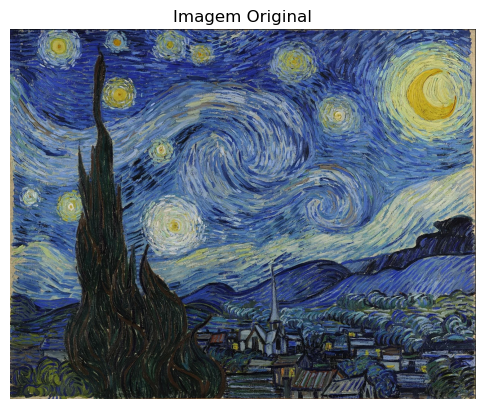

In [4]:
img = cv.imread("../src/starryNight.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Questão 1

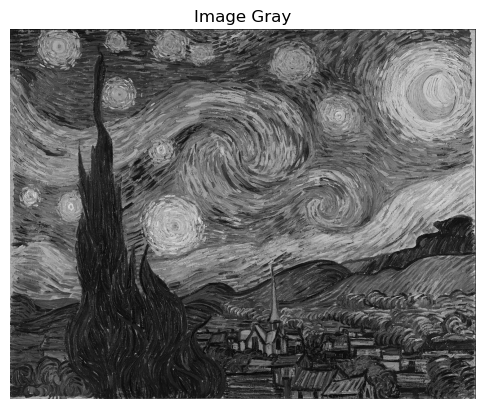

In [5]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Image Gray')
plt.axis('off')
plt.show()

# Questão 2

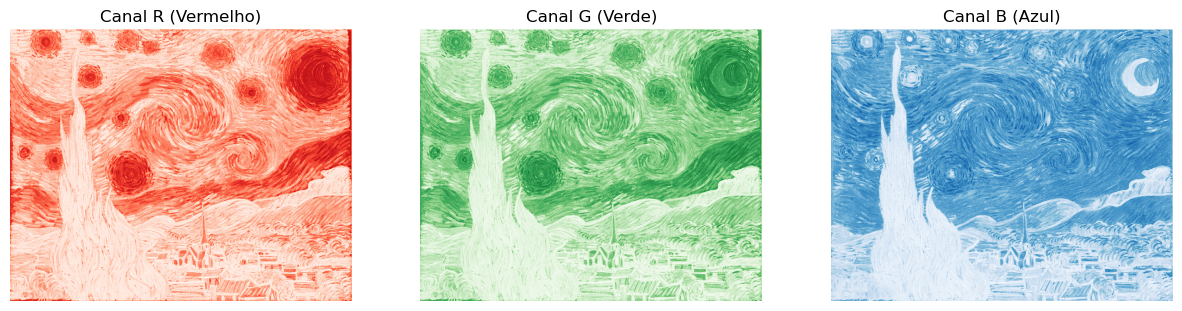

In [6]:
R, G, B = cv.split(img)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(R, cmap='Reds')
axes[0].set_title('Canal R (Vermelho)')
axes[0].axis('off')

axes[1].imshow(G, cmap='Greens')
axes[1].set_title('Canal G (Verde)')
axes[1].axis('off')

axes[2].imshow(B, cmap='Blues')
axes[2].set_title('Canal B (Azul)')
axes[2].axis('off')

plt.show()

# Questão 3

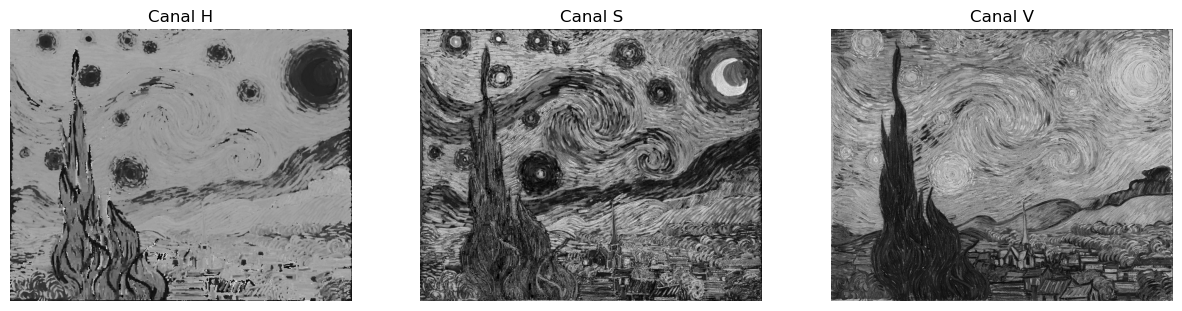

In [7]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
H, S, V = cv.split(img_hsv)

# Plotar os canais usando Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(H, cmap='gray')
axes[0].set_title('Canal H')
axes[0].axis('off')

axes[1].imshow(S, cmap='gray')
axes[1].set_title('Canal S')
axes[1].axis('off')

axes[2].imshow(V, cmap='gray')
axes[2].set_title('Canal V')
axes[2].axis('off')

plt.show()

# Questão 4

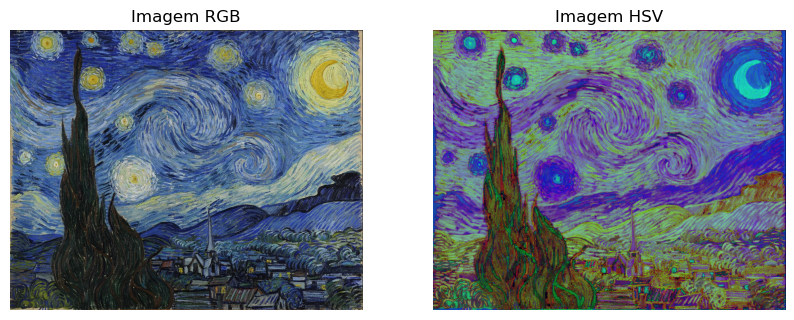

In [8]:
img_rgb = cv.merge((R, G, B))
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Imagem RGB')
plt.axis('off')

img_hsv = cv.merge((H, S, V))
plt.subplot(122)
plt.imshow(img_hsv)
plt.title('Imagem HSV')
plt.axis('off')

plt.show()

# Questão 5

In [9]:
def Filtro_media(img, canais):
  if canais:
    padded_image = np.pad(img, pad_width=((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)
  else:
    padded_image = np.pad(img, pad_width=((1, 1), (1, 1)), mode='constant', constant_values=0)

  img_resulty = np.zeros_like(img)

  for i in range(1, padded_image.shape[0]-1):
    for j in range(1, padded_image.shape[1]-1):
      media_pixel = (padded_image[i-1, j-1]/ 9 + padded_image[i-1, j]/ 9 + padded_image[i-1, j+1]/ 9 +
              padded_image[i, j-1]/ 9 + padded_image[i, j]/ 9 + padded_image[i, j+1]/ 9 +
              padded_image[i+1, j-1]/ 9 + padded_image[i+1, j]/ 9 + padded_image[i+1, j+1]/ 9)
      img_resulty[i-1, j-1] = media_pixel

  return img_resulty

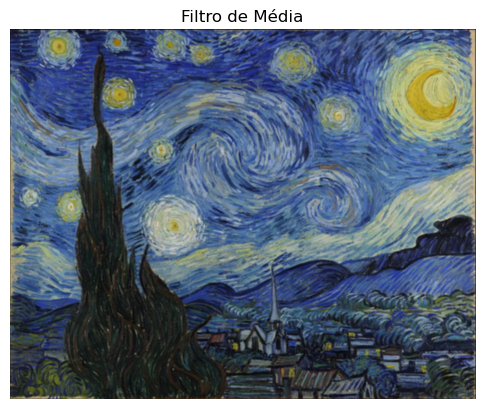

In [10]:
img_media = Filtro_media(img, True)

plt.imshow(img_media)
plt.title('Filtro de Média')
plt.axis('off')
plt.show()

# Questão 6

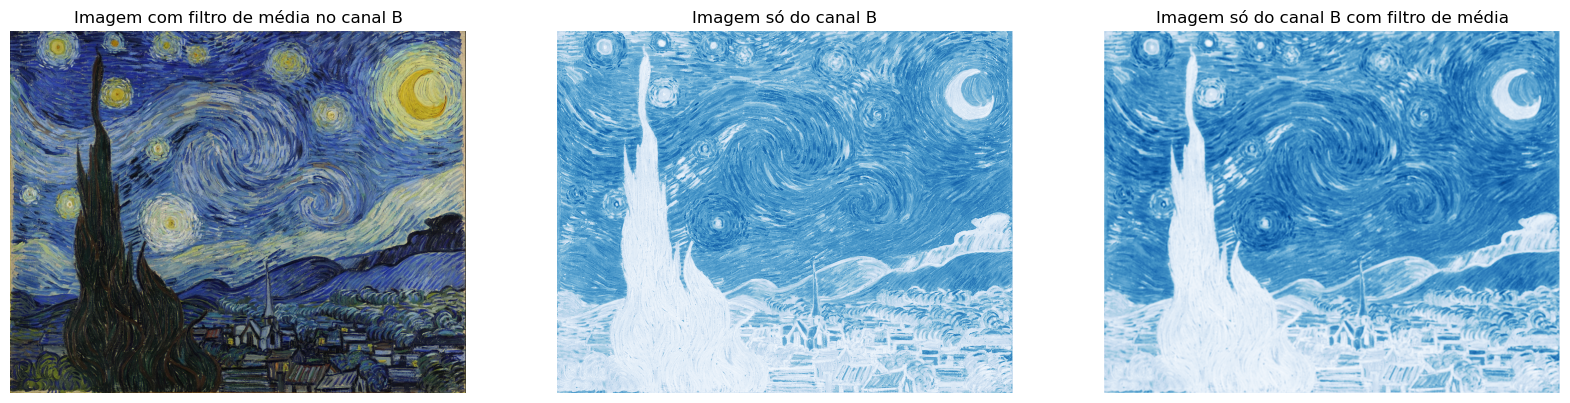

In [11]:
img_b = Filtro_media(B, False)
img_rgb = cv.merge((R, G, img_b))

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(img_rgb)
plt.title('Imagem com filtro de média no canal B')
plt.axis('off')

plt.subplot(132)
plt.imshow(B, cmap='Blues')
plt.title('Imagem só do canal B')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_b, cmap='Blues')
plt.title('Imagem só do canal B com filtro de média')
plt.axis('off')
plt.show()

# Questão 7

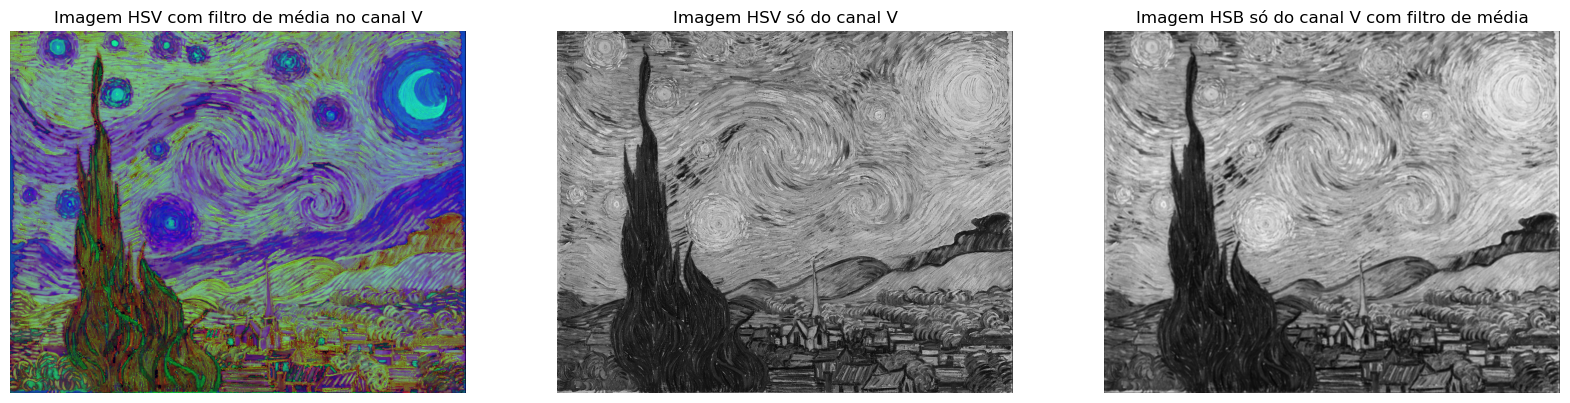

In [12]:
img_v = Filtro_media(V, False)
img_hsv2 = cv.merge((H, S, img_v))

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(img_hsv2)
plt.title('Imagem HSV com filtro de média no canal V')
plt.axis('off')

plt.subplot(132)
plt.imshow(V, cmap='gray')
plt.title('Imagem HSV só do canal V')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_v, cmap='gray')
plt.title('Imagem HSB só do canal V com filtro de média')
plt.axis('off')
plt.show()